# Predictive Hiring

This project is designed to build a classification model to predict whether candidate will get hired or not.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime as dt
import category_encoders as ce
from scipy.stats import zscore
from scipy import stats
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import RandomizedSearchCV 
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
import warnings
warnings.filterwarnings("ignore")
print("Libraries are imported")

Libraries are imported


# 1. Loading Data 

In [2]:
## Loading data from csv to a dataframe
filename = 'Hiring_Challenge.csv'
hire_df = pd.read_csv(filename)
hire_df.head()

C1     C2     C3 C4 C5 C6 C7    C8 C9 C10  C11 C12 C13  C14  C15  Hired
0  b  30.83  0.000  u  g  w  v  1.25  t   t    1   f   g  202    0      1
1  a  58.67  4.460  u  g  q  h  3.04  t   t    6   f   g   43  560      1
2  a   24.5  0.500  u  g  q  h  1.50  t   f    0   f   g  280  824      1
3  b  27.83  1.540  u  g  w  v  3.75  t   t    5   t   g  100    3      1
4  b  20.17  5.625  u  g  w  v  1.71  t   f    0   f   s  120    0      1

In [3]:
###Exploring the data types of dataframe
hire_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   C1      690 non-null    object 
 1   C2      690 non-null    object 
 2   C3      690 non-null    float64
 3   C4      690 non-null    object 
 4   C5      690 non-null    object 
 5   C6      690 non-null    object 
 6   C7      690 non-null    object 
 7   C8      690 non-null    float64
 8   C9      690 non-null    object 
 9   C10     690 non-null    object 
 10  C11     690 non-null    int64  
 11  C12     690 non-null    object 
 12  C13     690 non-null    object 
 13  C14     690 non-null    object 
 14  C15     690 non-null    int64  
 15  Hired   690 non-null    int64  
dtypes: float64(2), int64(3), object(11)
memory usage: 86.4+ KB


# 2. Data Cleaning

In this stage null values will be identified and will be processed and converted to non null values using imputation techniques, will handle duplicate values and inconsistent data types will be made consistent.

## 2.1 Identifying Null values

In [4]:
### Checking if we have null values
hire_df.isnull().sum()

C1       0
C2       0
C3       0
C4       0
C5       0
C6       0
C7       0
C8       0
C9       0
C10      0
C11      0
C12      0
C13      0
C14      0
C15      0
Hired    0
dtype: int64

In [5]:
### Checking if we have duplicate values
hire_df.duplicated().sum()

0

## 2.2 Inconsistent Data types
Converting continuous to numerical data types and categorical to object data types.

In [6]:
hire_df_clean = hire_df.copy()

### Manipulating the datatypes of C2 as float as it is continuous
#hire_df_clean['C2'] = hire_df_clean['C2'].astype('float')
#hire_df.info()

##Manipulating the datatypes of C2 as int as it is continuous
#hire_df_clean['C14'] = hire_df_clean['C14'].astype('int')
#hire_df_clean.info()

By performing above datatype conversion operation it has been identified that we have ? values, which needs to be addressed before converting it into numerical data type.

In [7]:
## checking the total ? occurences
hire_df_clean.isin(['?']).sum()

C1       12
C2       12
C3        0
C4        6
C5        6
C6        9
C7        9
C8        0
C9        0
C10       0
C11       0
C12       0
C13       0
C14      13
C15       0
Hired     0
dtype: int64

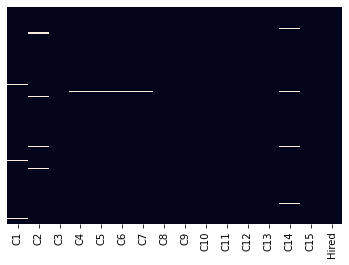

In [8]:
## Checking '?' value distribution on dataframe 
sns.heatmap(hire_df_clean.isin(['?']), yticklabels = False, cbar = False)

In [9]:
###Replacing all ? with nan for further cleaning
hire_df_clean = hire_df_clean.replace('?', np.nan)
hire_df_clean.isnull().sum()

C1       12
C2       12
C3        0
C4        6
C5        6
C6        9
C7        9
C8        0
C9        0
C10       0
C11       0
C12       0
C13       0
C14      13
C15       0
Hired     0
dtype: int64

In [10]:
### Converting continuous objects to numerical data type
#####To handle missing values in continuous variable, converting obect to numerical
hire_df_clean['C2'] = hire_df_clean['C2'].astype('float')
###C14 is of type int but is converted to float as we have NaN which is a float value
hire_df_clean['C14'] = hire_df_clean['C14'].astype('float')
###Checking mean and median to see which is more preferrable
print(hire_df_clean['C2'].describe(), hire_df_clean['C14'].describe())

count    678.000000
mean      31.568171
std       11.957862
min       13.750000
25%       22.602500
50%       28.460000
75%       38.230000
max       80.250000
Name: C2, dtype: float64 count     677.000000
mean      184.014771
std       173.806768
min         0.000000
25%        75.000000
50%       160.000000
75%       276.000000
max      2000.000000
Name: C14, dtype: float64


## 2.3 Data Imputation
Imputing categorical null values with most frequent value and for numerical values with median.

In [11]:
####Imputing categorical variables with most frequent value and numerical values with median
#hire_df.columns()
for C in hire_df_clean:
    if(hire_df_clean[C].dtype == np.dtype('O')):
        hire_df_clean[C].fillna(hire_df_clean[C].value_counts().index[0], inplace = True)
    else:
        hire_df_clean[C].fillna(np.nanmedian(hire_df_clean[C]), inplace = True)
hire_df_clean.isnull().sum()

C1       0
C2       0
C3       0
C4       0
C5       0
C6       0
C7       0
C8       0
C9       0
C10      0
C11      0
C12      0
C13      0
C14      0
C15      0
Hired    0
dtype: int64

In [12]:
### checking for NaN values after imputing numerical values
hire_df_clean.isnull().sum()

C1       0
C2       0
C3       0
C4       0
C5       0
C6       0
C7       0
C8       0
C9       0
C10      0
C11      0
C12      0
C13      0
C14      0
C15      0
Hired    0
dtype: int64

In [13]:
##converting C14 back to int as NaN values are cleared
hire_df_clean['C14'] = hire_df_clean['C14'].astype('int64')
hire_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   C1      690 non-null    object 
 1   C2      690 non-null    float64
 2   C3      690 non-null    float64
 3   C4      690 non-null    object 
 4   C5      690 non-null    object 
 5   C6      690 non-null    object 
 6   C7      690 non-null    object 
 7   C8      690 non-null    float64
 8   C9      690 non-null    object 
 9   C10     690 non-null    object 
 10  C11     690 non-null    int64  
 11  C12     690 non-null    object 
 12  C13     690 non-null    object 
 13  C14     690 non-null    int64  
 14  C15     690 non-null    int64  
 15  Hired   690 non-null    int64  
dtypes: float64(3), int64(4), object(9)
memory usage: 86.4+ KB


Data Cleaning is completed, missing data is handled using imputation techniques and inconsistent data types are made consistent.

# 3. Exploratory Data Analysis
In this section, Data Analysis is performed on dataset to summarize their main characteristics, plotting different distributions and identifying the patterns and relation between data.

In [14]:
### Checking if dataset is balanced
hire_df_clean['Hired'].value_counts()

0    383
1    307
Name: Hired, dtype: int64

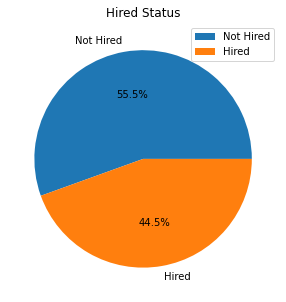

In [15]:
## Checking distribution of target variable
hire_df_clean['Hired'].value_counts().plot.pie(labels = ['Not Hired', 'Hired'], autopct='%1.1f%%', figsize = (5,5))
plt.title('Hired Status')
plt.ylabel('')
plt.legend()
plt.show()

This implies that distribution is balanced as we have alomst equal favourable and unfavourable scenarios

In [16]:
### Separating all Categorical variables
hire_df_cat = hire_df_clean.select_dtypes(include = 'object').copy()
hire_df_cat.head()

C1 C4 C5 C6 C7 C9 C10 C12 C13
0  b  u  g  w  v  t   t   f   g
1  a  u  g  q  h  t   t   f   g
2  a  u  g  q  h  t   f   f   g
3  b  u  g  w  v  t   t   t   g
4  b  u  g  w  v  t   f   f   s

In [17]:
### Seperating all numerical variables
hire_df_num = hire_df_clean.select_dtypes(exclude = 'object').copy()
hire_df_num.head()

C2     C3    C8  C11  C14  C15  Hired
0  30.83  0.000  1.25    1  202    0      1
1  58.67  4.460  3.04    6   43  560      1
2  24.50  0.500  1.50    0  280  824      1
3  27.83  1.540  3.75    5  100    3      1
4  20.17  5.625  1.71    0  120    0      1

In [18]:
## As we are working on a supervised ML problem, we should add dependent variable to our dataframe
hire_df_cat['Hired'] = hire_df_clean.loc[hire_df_clean.index, 'Hired'].copy()
hire_df_cat.head()

C1 C4 C5 C6 C7 C9 C10 C12 C13  Hired
0  b  u  g  w  v  t   t   f   g      1
1  a  u  g  q  h  t   t   f   g      1
2  a  u  g  q  h  t   f   f   g      1
3  b  u  g  w  v  t   t   t   g      1
4  b  u  g  w  v  t   f   f   s      1

## 3.1 Categorical Data Analysis

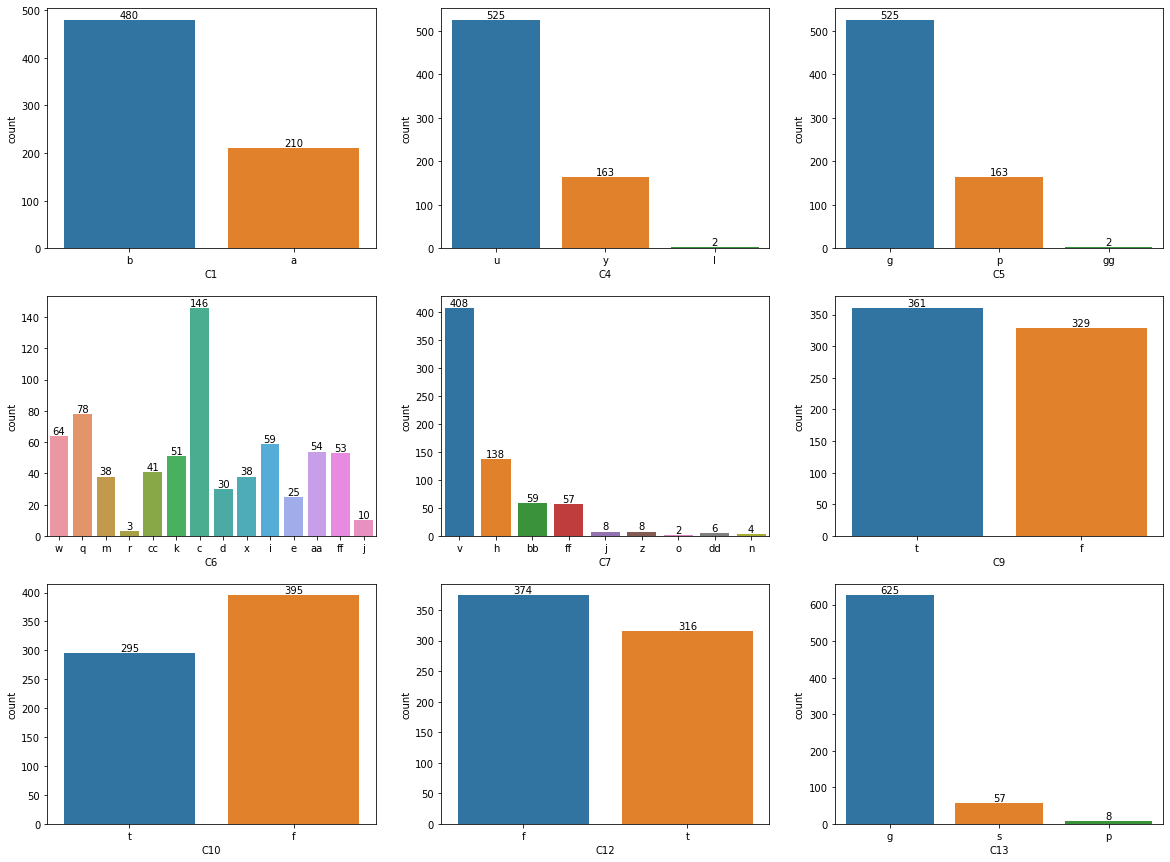

In [19]:
# frquency Distribution of categorical variables
fig, ax = plt.subplots(3,3, figsize = (20,15))
for variable, subplot in zip(hire_df_cat.columns, ax.flatten()):
    splot = sns.countplot(data = hire_df_cat, x = variable, ax = subplot)
    for p in splot.patches:
        splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height() ), ha = 'center', va = 'center', xytext = (0, 5) , textcoords = 'offset points')

Based on the above graphs, it is almost evident that C4 and C5 are resembling the same. C6, C7 graphs are bit messy due to more number of values for the feature and this needs some feature engineering.

In [20]:
pd.crosstab(hire_df_cat.C5, hire_df_cat.Hired)

Hired    0    1
C5             
g      265  260
gg       0    2
p      118   45

In [21]:
pd.crosstab(hire_df_cat.C4, hire_df_cat.Hired)

Hired    0    1
C4             
l        0    2
u      265  260
y      118   45

It is appearing that C4, C5 are exactly the same.

In [22]:
## Converting categorical value to numerical value to compare if these features are exactly same
###factorize takes first found value in a column as 0 and next unique values as 1 and so on
# so even if the categorical values are different the resulting numerical array would be the same
C4 = pd.factorize(hire_df_cat['C4'])[0]
C5 = pd.factorize(hire_df_cat['C4'])[0]
## Comparing if the new arrays are exactly same
np.array_equal(C4, C5)

True

As it has been identified that C4, C5 are replicas, C5 column can be dropped to reduce the dimensionality for our model and will be done in feature engineering section.

In [23]:
##Comparing Hired and each of the categorical variables
for C in hire_df_cat:
    print(pd.crosstab(hire_df_cat.Hired, hire_df_cat[C]))

C1       a    b
Hired          
0      112  271
1       98  209
C4     l    u    y
Hired             
0      0  265  118
1      2  260   45
C5       g  gg    p
Hired              
0      265   0  118
1      260   2   45
C6     aa   c  cc   d   e  ff   i  j   k   m   q  r   w   x
Hired                                                      
0      35  80  12  23  11  46  45  7  37  22  27  1  31   6
1      19  66  29   7  14   7  14  3  14  16  51  2  33  32
C7     bb  dd  ff   h  j  n  o    v  z
Hired                                 
0      34   4  49  51  5  2  1  235  2
1      25   2   8  87  3  2  1  173  6
C9       f    t
Hired          
0      306   77
1       23  284
C10      f    t
Hired          
0      297   86
1       98  209
C12      f    t
Hired          
0      213  170
1      161  146
C13      g  p   s
Hired            
0      338  3  42
1      287  5  15
Hired    0    1
Hired          
0      383    0
1        0  307


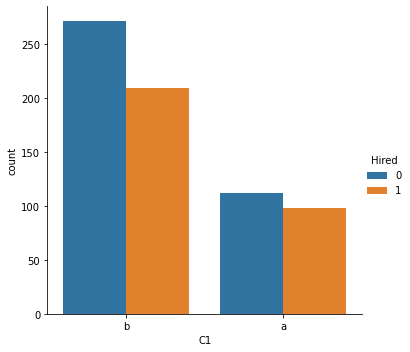

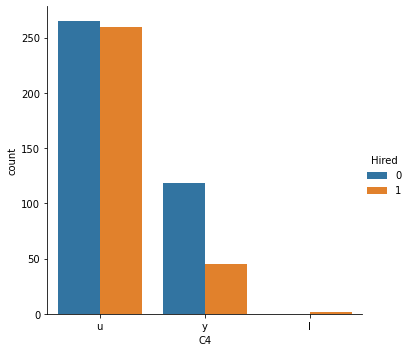

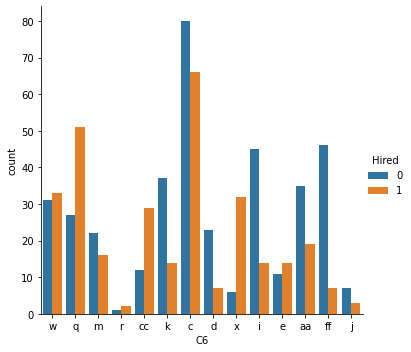

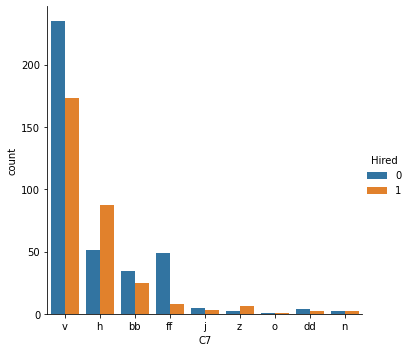

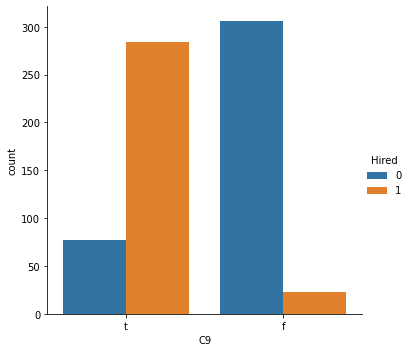

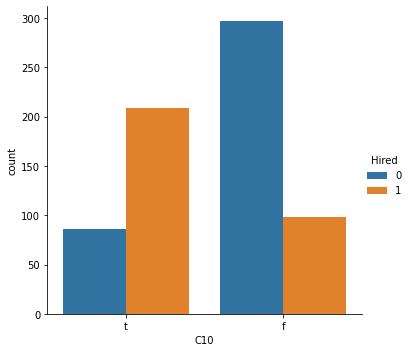

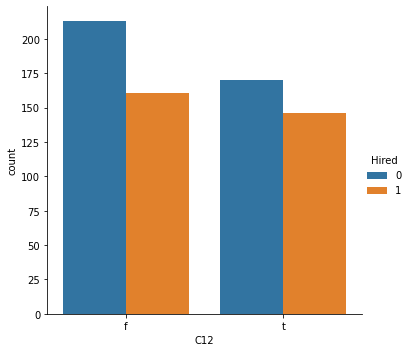

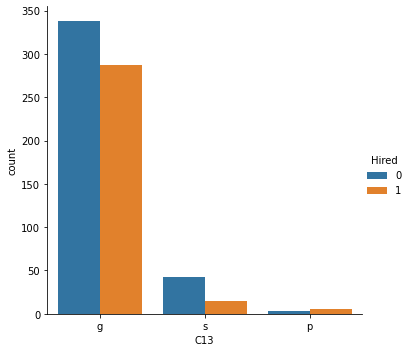

In [24]:
# frquency Distribution of categorical variables along with target variable
sns.catplot('C1', hue = 'Hired', data = hire_df_cat,  kind = 'count')
sns.catplot('C4', hue = 'Hired', data = hire_df_cat,  kind = 'count')
sns.catplot('C6', hue = 'Hired', data = hire_df_cat,  kind = 'count')
sns.catplot('C7', hue = 'Hired', data = hire_df_cat,  kind = 'count')
sns.catplot('C9', hue = 'Hired', data = hire_df_cat,  kind = 'count')
sns.catplot('C10', hue = 'Hired', data = hire_df_cat,  kind = 'count')
sns.catplot('C12', hue = 'Hired', data = hire_df_cat,  kind = 'count')
sns.catplot('C13', hue = 'Hired', data = hire_df_cat,  kind = 'count')


From these distributions it appears almost all are equally distributed but C9, C10 are showing good relation.

## 3.2 Feature Engineering on categorical data
In this section, unwanted features will be dropped and categorical features will be converted into numerical as ML models can handle only numeric data in most cases. 

In [25]:
## Dropping C5 column, to avoid redundancy
hire_df_cat.drop('C5', axis = 1, inplace = True)
hire_df_cat.head()

C1 C4 C6 C7 C9 C10 C12 C13  Hired
0  b  u  w  v  t   t   f   g      1
1  a  u  q  h  t   t   f   g      1
2  a  u  q  h  t   f   f   g      1
3  b  u  w  v  t   t   t   g      1
4  b  u  w  v  t   f   f   s      1

In [26]:
print(hire_df_cat['C6'].describe(),'\n', hire_df_cat['C7'].describe())

count     690
unique     14
top         c
freq      146
Name: C6, dtype: object 
 count     690
unique      9
top         v
freq      408
Name: C7, dtype: object


In [27]:
## Manipulating C7 so it contains only 2 categories, variable containing single letter as s and variable containing multiple letter as m
hire_df_cat['C7'] = hire_df_cat['C7'].apply(lambda x:'m' if len(x) > 1 else 's')
hire_df_cat['C7'].value_counts()

s    568
m    122
Name: C7, dtype: int64

In [28]:
hire_df_cat['C6'].value_counts()

c     146
q      78
w      64
i      59
aa     54
ff     53
k      51
cc     41
x      38
m      38
d      30
e      25
j      10
r       3
Name: C6, dtype: int64

As C6 categorical variable has many values it will not make good feature, dropping C6 feature.

In [29]:
## Dropping C6 feature
hire_df_cat.drop('C6', axis = 1, inplace = True)
hire_df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   C1      690 non-null    object
 1   C4      690 non-null    object
 2   C7      690 non-null    object
 3   C9      690 non-null    object
 4   C10     690 non-null    object
 5   C12     690 non-null    object
 6   C13     690 non-null    object
 7   Hired   690 non-null    int64 
dtypes: int64(1), object(7)
memory usage: 43.2+ KB


In [30]:
### Converting categorical variables into numerical variables ,when we have less number of unique values in that column
hire_df_cat = pd.get_dummies(hire_df_cat, columns = ['C1','C7', 'C9', 'C10', 'C12'], drop_first = True)
print(hire_df_cat.head())
print(hire_df_cat['C4'].value_counts(), hire_df_cat['C13'].value_counts())

  C4 C13  Hired  C1_b  C7_s  C9_t  C10_t  C12_t
0  u   g      1     1     1     1      1      0
1  u   g      1     0     1     1      1      0
2  u   g      1     0     1     1      0      0
3  u   g      1     1     1     1      1      1
4  u   s      1     1     1     1      0      0
u    525
y    163
l      2
Name: C4, dtype: int64 g    625
s     57
p      8
Name: C13, dtype: int64


In [31]:
### for C4 and C13 few values have very less entries less than 10, these need to be dropped as well
hire_df_cat = pd.get_dummies(hire_df_cat, columns =['C4', 'C13'])
hire_df_cat.head()

Hired  C1_b  C7_s  C9_t  C10_t  C12_t  C4_l  C4_u  C4_y  C13_g  C13_p  \
0      1     1     1     1      1      0     0     1     0      1      0   
1      1     0     1     1      1      0     0     1     0      1      0   
2      1     0     1     1      0      0     0     1     0      1      0   
3      1     1     1     1      1      1     0     1     0      1      0   
4      1     1     1     1      0      0     0     1     0      0      0   

   C13_s  
0      0  
1      0  
2      0  
3      0  
4      1

In [32]:
## Dropping less value and the first value
hire_df_cat.drop(['C4_l', 'C4_u', 'C13_p', 'C13_g'], axis = 1, inplace = True)
hire_df_cat.head()

Hired  C1_b  C7_s  C9_t  C10_t  C12_t  C4_y  C13_s
0      1     1     1     1      1      0     0      0
1      1     0     1     1      1      0     0      0
2      1     0     1     1      0      0     0      0
3      1     1     1     1      1      1     0      0
4      1     1     1     1      0      0     0      1

All the data for categorical data has been cleaned and converted into numeric and is ready to be loaded to model.

## 3.3 Numerical Data Analysis

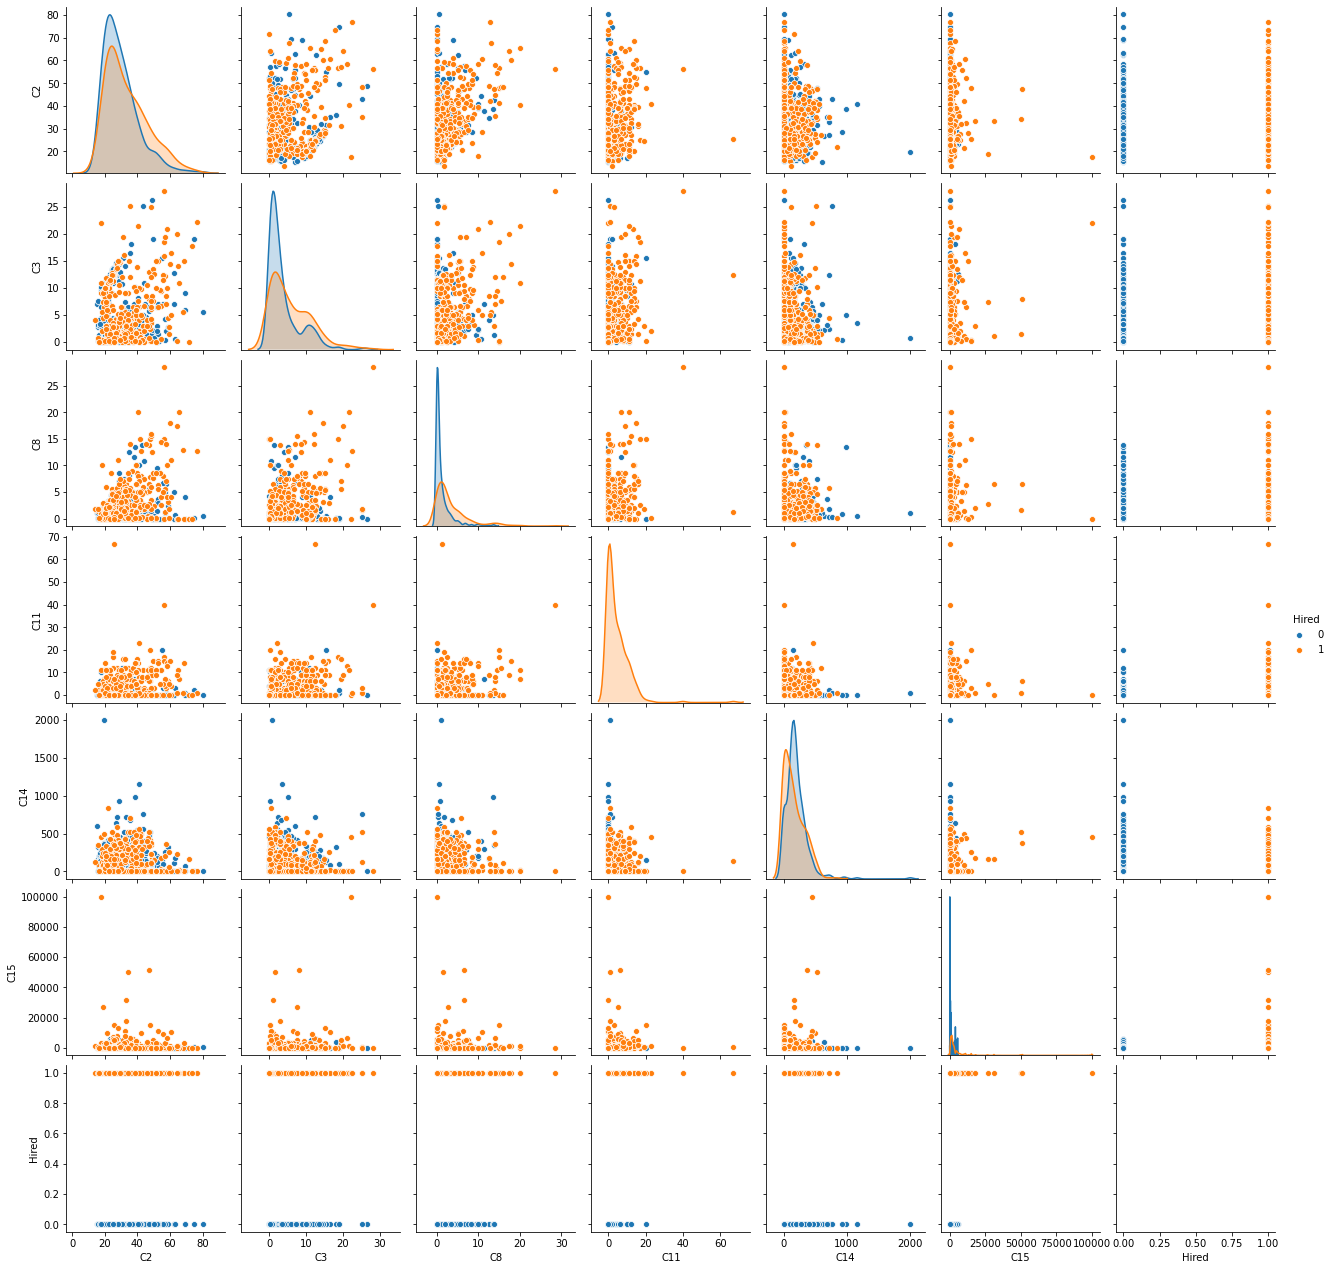

In [33]:
## Distribution of numerical varaiables
sns.pairplot(data=hire_df_num, vars=hire_df_num.columns.values, hue='Hired')

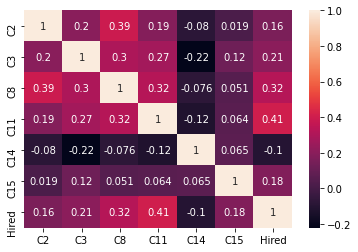

In [34]:
##  Correlation matrix for numerical varaibles
sns.heatmap(hire_df_num.corr(), annot = True)

In [35]:
##Checking extreme values
for C in hire_df_num:
    print("Skewness for {}: {}".format(C, hire_df_num[C].skew()))

Skewness for C2: 1.1673042222218972
Skewness for C3: 1.4888131246649208
Skewness for C8: 2.891330424153805
Skewness for C11: 5.152519857445985
Skewness for C14: 2.7562762137689933
Skewness for C15: 13.140655014445459
Skewness for Hired: 0.22212157058948015


In [36]:
### Checking statistics values for the numerical variables
hire_df_num.describe()

C2          C3          C8        C11          C14  \
count  690.000000  690.000000  690.000000  690.00000   690.000000   
mean    31.514116    4.758725    2.223406    2.40000   183.562319   
std     11.860245    4.978163    3.346513    4.86294   172.190278   
min     13.750000    0.000000    0.000000    0.00000     0.000000   
25%     22.670000    1.000000    0.165000    0.00000    80.000000   
50%     28.460000    2.750000    1.000000    0.00000   160.000000   
75%     37.707500    7.207500    2.625000    3.00000   272.000000   
max     80.250000   28.000000   28.500000   67.00000  2000.000000   

                 C15       Hired  
count     690.000000  690.000000  
mean     1017.385507    0.444928  
std      5210.102598    0.497318  
min         0.000000    0.000000  
25%         0.000000    0.000000  
50%         5.000000    0.000000  
75%       395.500000    1.000000  
max    100000.000000    1.000000

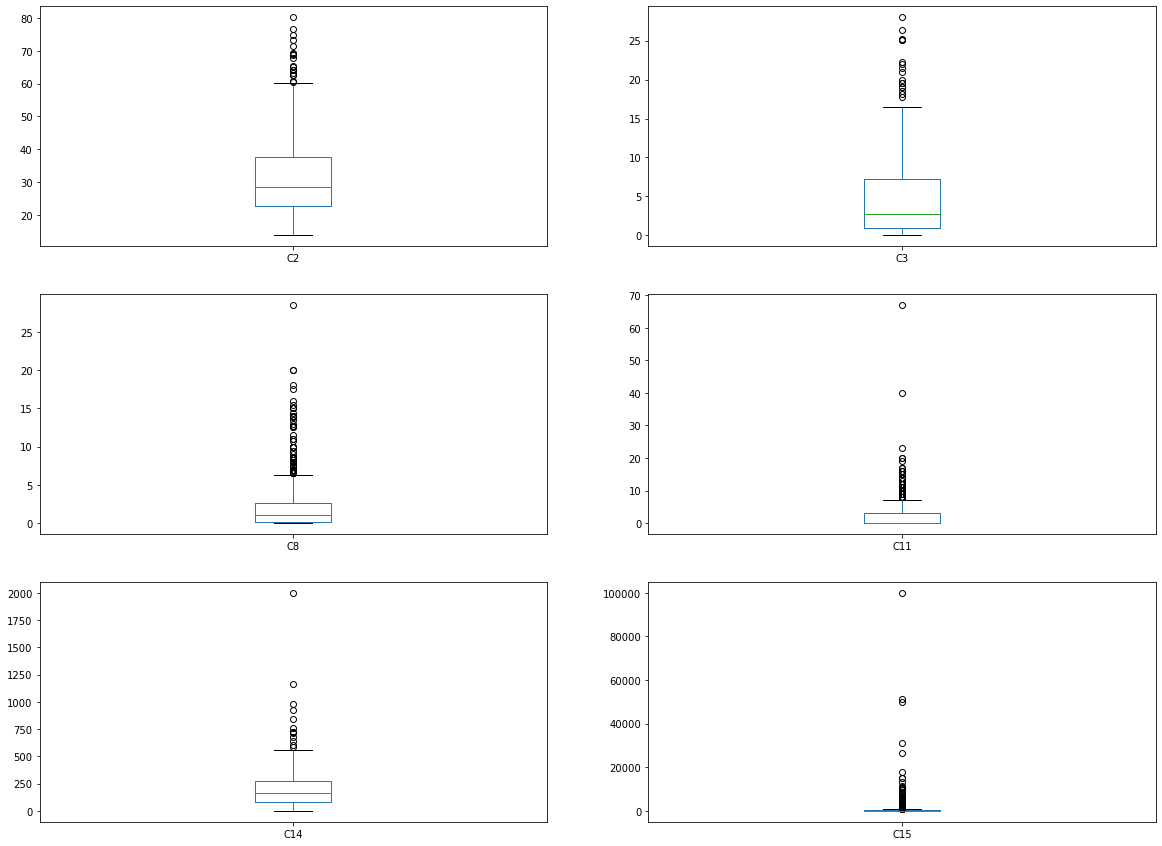

In [37]:
### Identifying outliers
fig, axes = plt.subplots(3,2, figsize = (20,15))
for i, col in enumerate(list(hire_df_num.columns[:-1])):
    hire_df_num[hire_df_num.columns[i]].plot.box( ax = axes.flatten()[i])
    #print(hire_df_num.columns[i])

From the above boxplots it's significant that we have large number of outliers and all of them are poistively skewed

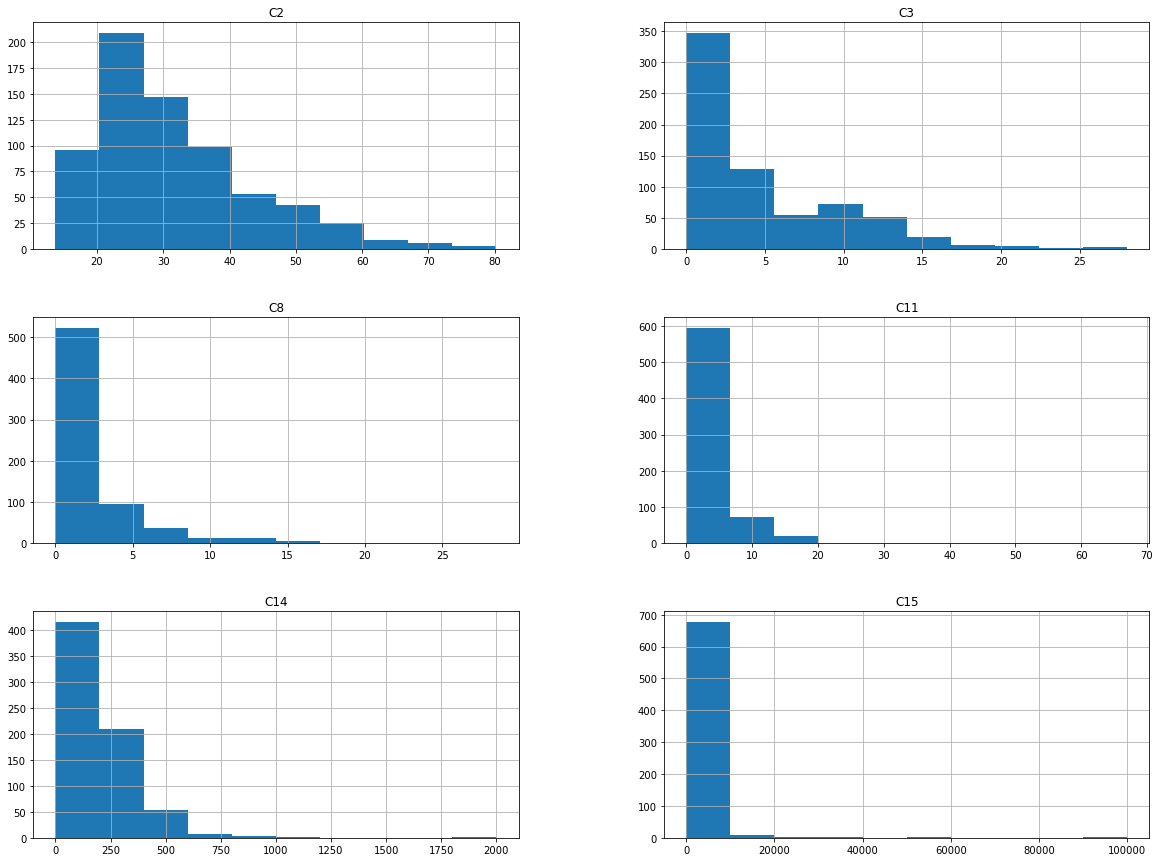

In [38]:
## Checking distribution of these outliers using histogram
fig, axes = plt.subplots(3,2, figsize = (20,15))
for i, col in enumerate(list(hire_df_num.columns[:-1])):
    hire_df_num.hist(column = [hire_df_num.columns[i]], ax = axes.flatten()[i])

Above plot states that all columns are right tailed distribution, these outliers can be treated using log transformation, Box-cox transformation but as we have 0 values these can't be applied. We will apply power transformer and in turn use yeo-johnson. 

## 3.4 Feature Engineering on numeric data

In [39]:
def plots(df, var, t):
    plt.figure(figsize=(13,5))
    plt.subplot(121)
    sns.kdeplot(df[var])
    plt.title('before ' + str(t).split('(')[0])
    
    plt.subplot(122)
    p1 = t.fit_transform(df[[var]]).flatten()
    sns.kdeplot(p1)
    plt.title('after ' + str(t).split('(')[0])

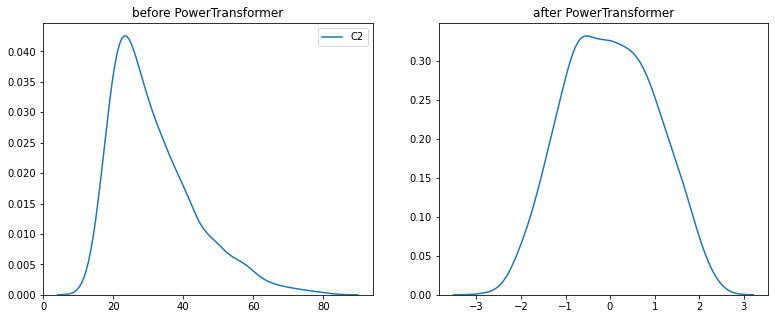

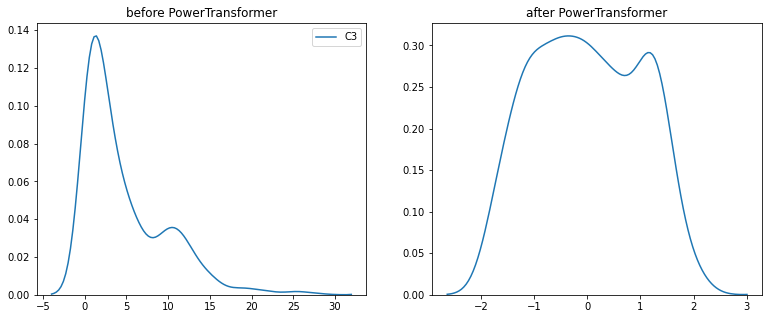

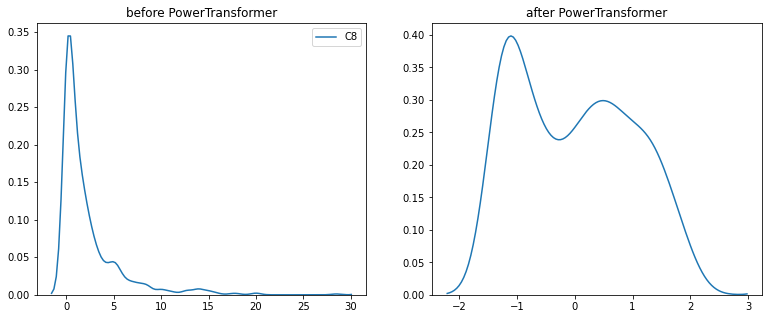

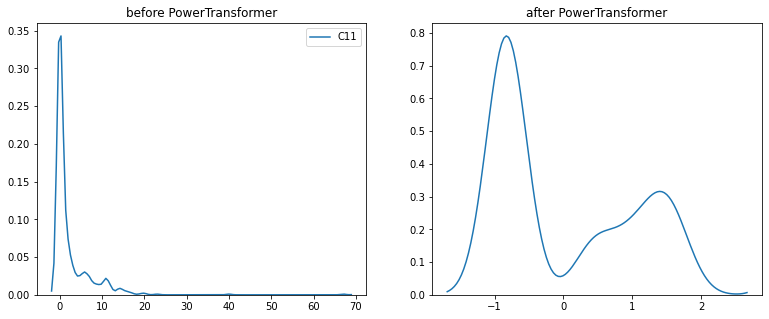

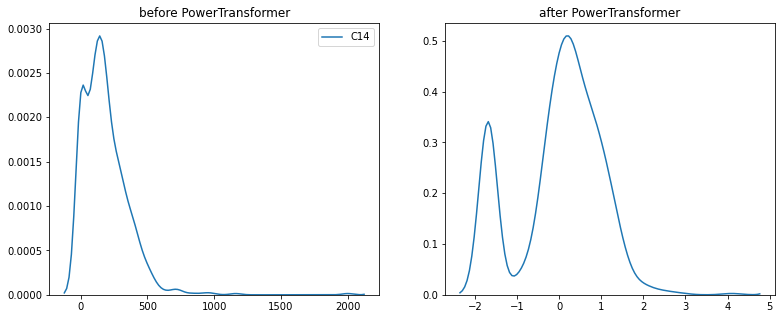

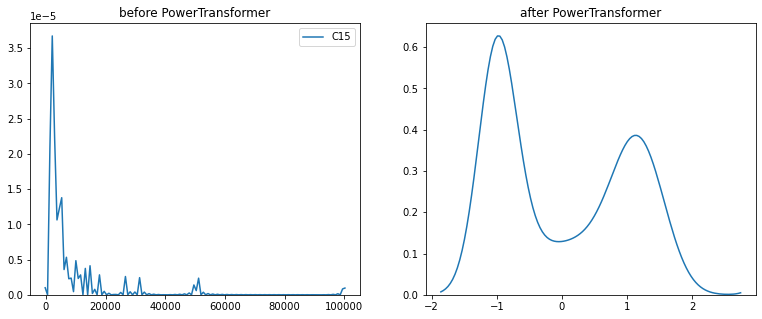

In [40]:
## Apllying Power transformer and using yeo-johnson menthod
for col in hire_df_num.columns[:-1]:
    plots(hire_df_num, col, PowerTransformer(method = 'yeo-johnson'))
#hire_df_num_fit = stats.boxcox(hire_df_num['C14'].to_numpy(), lmbda=None)
#sns.distplot(hire_df_num_fit['C14'])

Right skewed data has been successfully converted in gaussian distribution using power transformation

In [41]:
## preparing data frame to pass to power transformer
hire_df_num_out = hire_df_num.loc[:, hire_df_num.columns != 'Hired']

In [42]:
hire_df_num_out.head()
hire_df_num_out.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   C2      690 non-null    float64
 1   C3      690 non-null    float64
 2   C8      690 non-null    float64
 3   C11     690 non-null    int64  
 4   C14     690 non-null    int64  
 5   C15     690 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 32.5 KB


In [43]:
# Applying powertransformer on data
p = PowerTransformer(method = 'yeo-johnson')
hire_df_num_fit = p.fit_transform(hire_df_num_out)


In [44]:
## Converting numpy array to dataframe
#print(hire_df_num.columns[:-1])
hire_df_num_clean = pd.DataFrame(data=hire_df_num_fit, index = hire_df_num.index, columns=hire_df_num.columns[:-1])
print(hire_df_num_clean.head())

         C2        C3        C8       C11       C14       C15
0  0.210211 -1.774256  0.188974  0.439235  0.404085 -0.997061
1  1.773303  0.396019  0.913929  1.411046 -0.698863  1.111084
2 -0.490074 -1.215338  0.338848 -0.826785  0.742163  1.189061
3 -0.091471 -0.528415  1.073588  1.342644 -0.185603 -0.365466
4 -1.150510  0.616621  0.447373 -0.826785 -0.048831 -0.997061


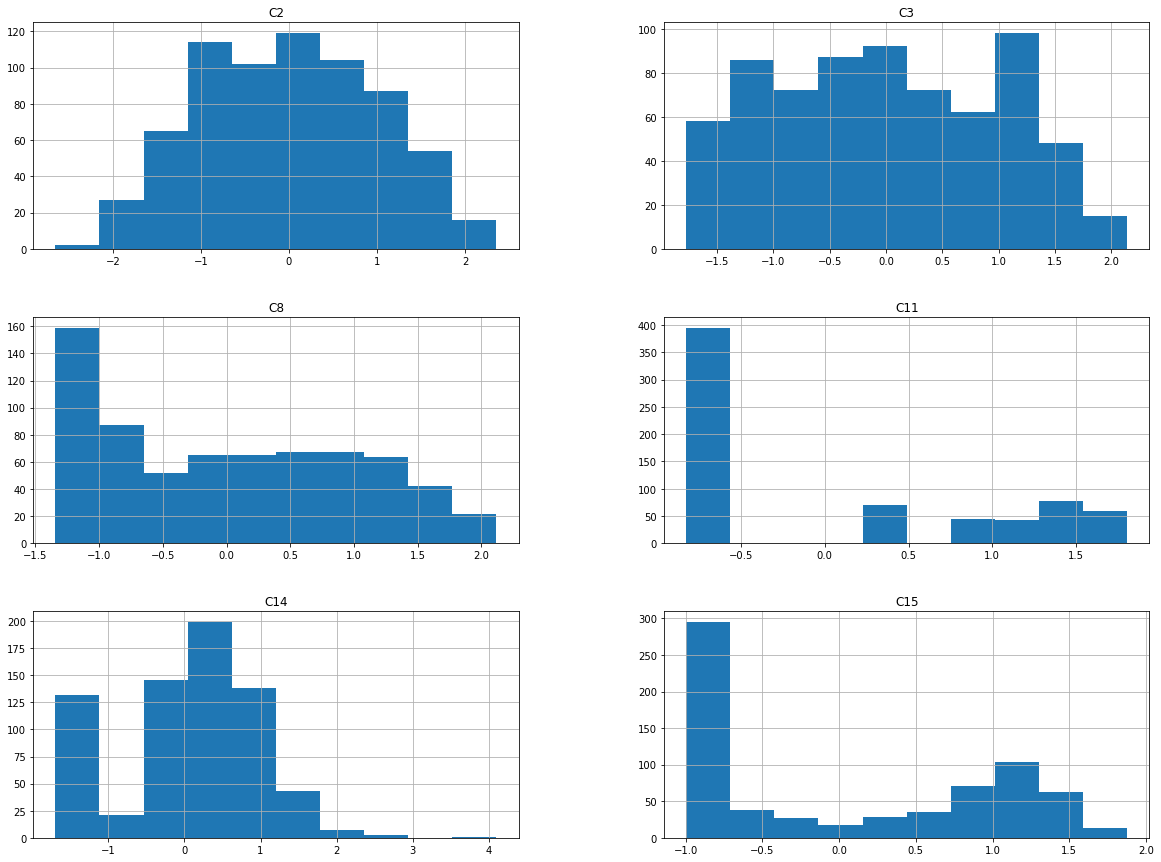

In [45]:
### Calculating histogram after power transformation
fig, axes = plt.subplots(3,2, figsize = (20,15))
for i, col in enumerate(list(hire_df_num_clean.columns)):
    hire_df_num_clean.hist(column = [hire_df_num_clean.columns[i]], ax = axes.flatten()[i])

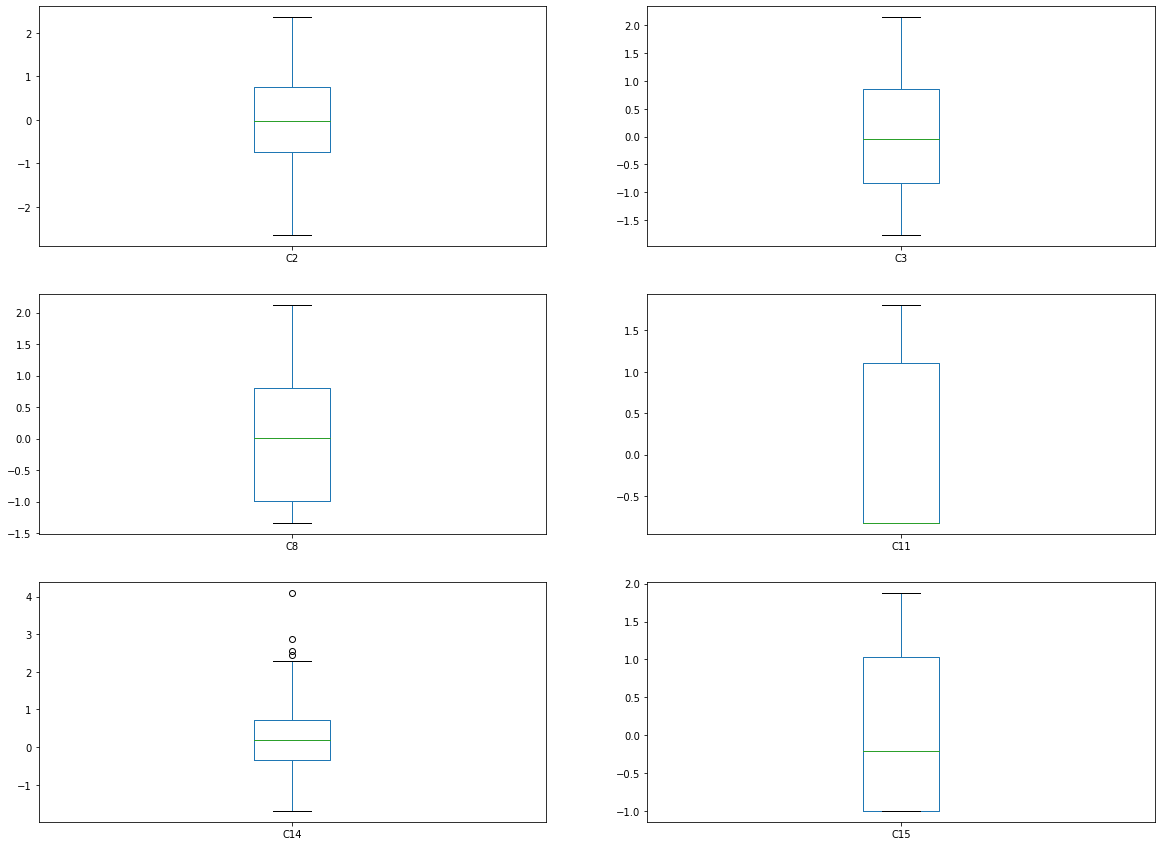

In [46]:
### Boxplot after power transformation
fig, axes = plt.subplots(3,2, figsize = (20,15))
for i, col in enumerate(list(hire_df_num_clean.columns)):
    hire_df_num_clean[hire_df_num_clean.columns[i]].plot.box( ax = axes.flatten()[i])

Almost all outliers have been handled, we still see some outliers in C14. As the outliers are less these can be imputed with mean or median value

In [47]:
hire_df_num_clean.describe()

C2            C3            C8           C11           C14  \
count  6.900000e+02  6.900000e+02  6.900000e+02  6.900000e+02  6.900000e+02   
mean  -7.911546e-16  1.609019e-17  2.078852e-16  4.402276e-16  6.339534e-17   
std    1.000725e+00  1.000725e+00  1.000725e+00  1.000725e+00  1.000725e+00   
min   -2.652590e+00 -1.774256e+00 -1.342338e+00 -8.267849e-01 -1.692957e+00   
25%   -7.459456e-01 -8.348136e-01 -9.945788e-01 -8.267849e-01 -3.394397e-01   
50%   -2.412487e-02 -4.729222e-02  9.875068e-03 -8.267849e-01  1.892284e-01   
75%    7.583347e-01  8.550446e-01  7.980759e-01  1.108817e+00  7.102688e-01   
max    2.357972e+00  2.143427e+00  2.117710e+00  1.804885e+00  4.096770e+00   

                C15  
count  6.900000e+02  
mean  -6.194723e-17  
std    1.000725e+00  
min   -9.970607e-01  
25%   -9.970607e-01  
50%   -2.026138e-01  
75%    1.037247e+00  
max    1.877998e+00

In [48]:
### As we have only few outliers replacing them with median 
Q1 = hire_df_num_clean['C14'].quantile(0.25)
Q3 = hire_df_num_clean['C14'].quantile(0.75)
IQR = Q3 - Q1
upper_fence = Q3 + (1.5 * IQR )
median = hire_df_num_clean.loc[hire_df_num_clean['C14']< upper_fence, 'C14'].median()
hire_df_num_clean.loc[hire_df_num_clean.C14 > upper_fence, 'C14'] = np.nan
hire_df_num_clean.fillna(median,inplace=True)
hire_df_num_clean.describe()

C2            C3            C8           C11         C14  \
count  6.900000e+02  6.900000e+02  6.900000e+02  6.900000e+02  690.000000   
mean  -7.911546e-16  1.609019e-17  2.078852e-16  4.402276e-16   -0.016287   
std    1.000725e+00  1.000725e+00  1.000725e+00  1.000725e+00    0.972992   
min   -2.652590e+00 -1.774256e+00 -1.342338e+00 -8.267849e-01   -1.692957   
25%   -7.459456e-01 -8.348136e-01 -9.945788e-01 -8.267849e-01   -0.339440   
50%   -2.412487e-02 -4.729222e-02  9.875068e-03 -8.267849e-01    0.189228   
75%    7.583347e-01  8.550446e-01  7.980759e-01  1.108817e+00    0.661378   
max    2.357972e+00  2.143427e+00  2.117710e+00  1.804885e+00    2.280803   

                C15  
count  6.900000e+02  
mean  -6.194723e-17  
std    1.000725e+00  
min   -9.970607e-01  
25%   -9.970607e-01  
50%   -2.026138e-01  
75%    1.037247e+00  
max    1.877998e+00

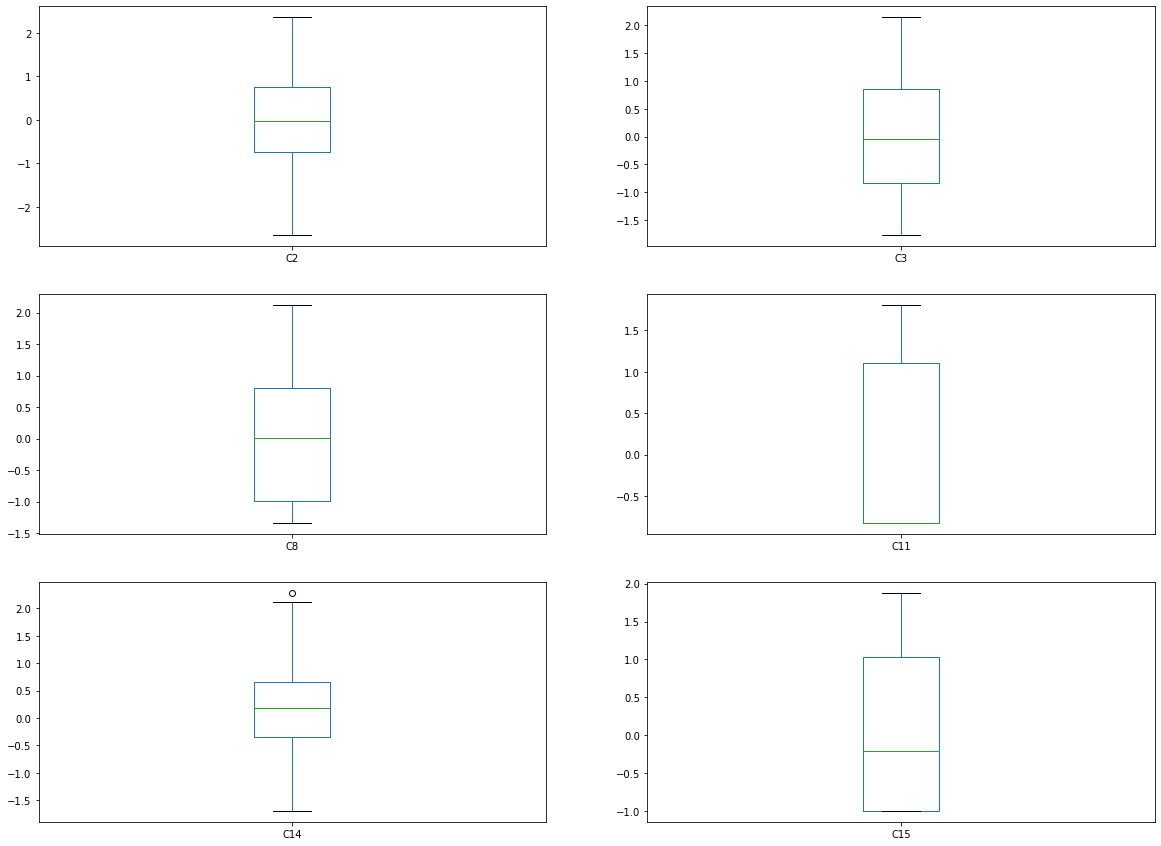

In [49]:
### Boxplot after power transformation and imputation
fig, axes = plt.subplots(3,2, figsize = (20,15))
for i, col in enumerate(list(hire_df_num_clean.columns)):
    hire_df_num_clean[hire_df_num_clean.columns[i]].plot.box( ax = axes.flatten()[i])

In [50]:
hire_df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   C2      690 non-null    float64
 1   C3      690 non-null    float64
 2   C8      690 non-null    float64
 3   C11     690 non-null    int64  
 4   C14     690 non-null    int64  
 5   C15     690 non-null    int64  
 6   Hired   690 non-null    int64  
dtypes: float64(3), int64(4)
memory usage: 37.9 KB


In [51]:
lastcol = hire_df.pop("Hired")
#lastcol.info()

In [52]:
hire_df_num_clean.insert(6, 'Hired',  lastcol)
hire_df_num_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   C2      690 non-null    float64
 1   C3      690 non-null    float64
 2   C8      690 non-null    float64
 3   C11     690 non-null    float64
 4   C14     690 non-null    float64
 5   C15     690 non-null    float64
 6   Hired   690 non-null    int64  
dtypes: float64(6), int64(1)
memory usage: 37.9 KB


In [53]:
hire_df_num_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   C2      690 non-null    float64
 1   C3      690 non-null    float64
 2   C8      690 non-null    float64
 3   C11     690 non-null    float64
 4   C14     690 non-null    float64
 5   C15     690 non-null    float64
 6   Hired   690 non-null    int64  
dtypes: float64(6), int64(1)
memory usage: 37.9 KB


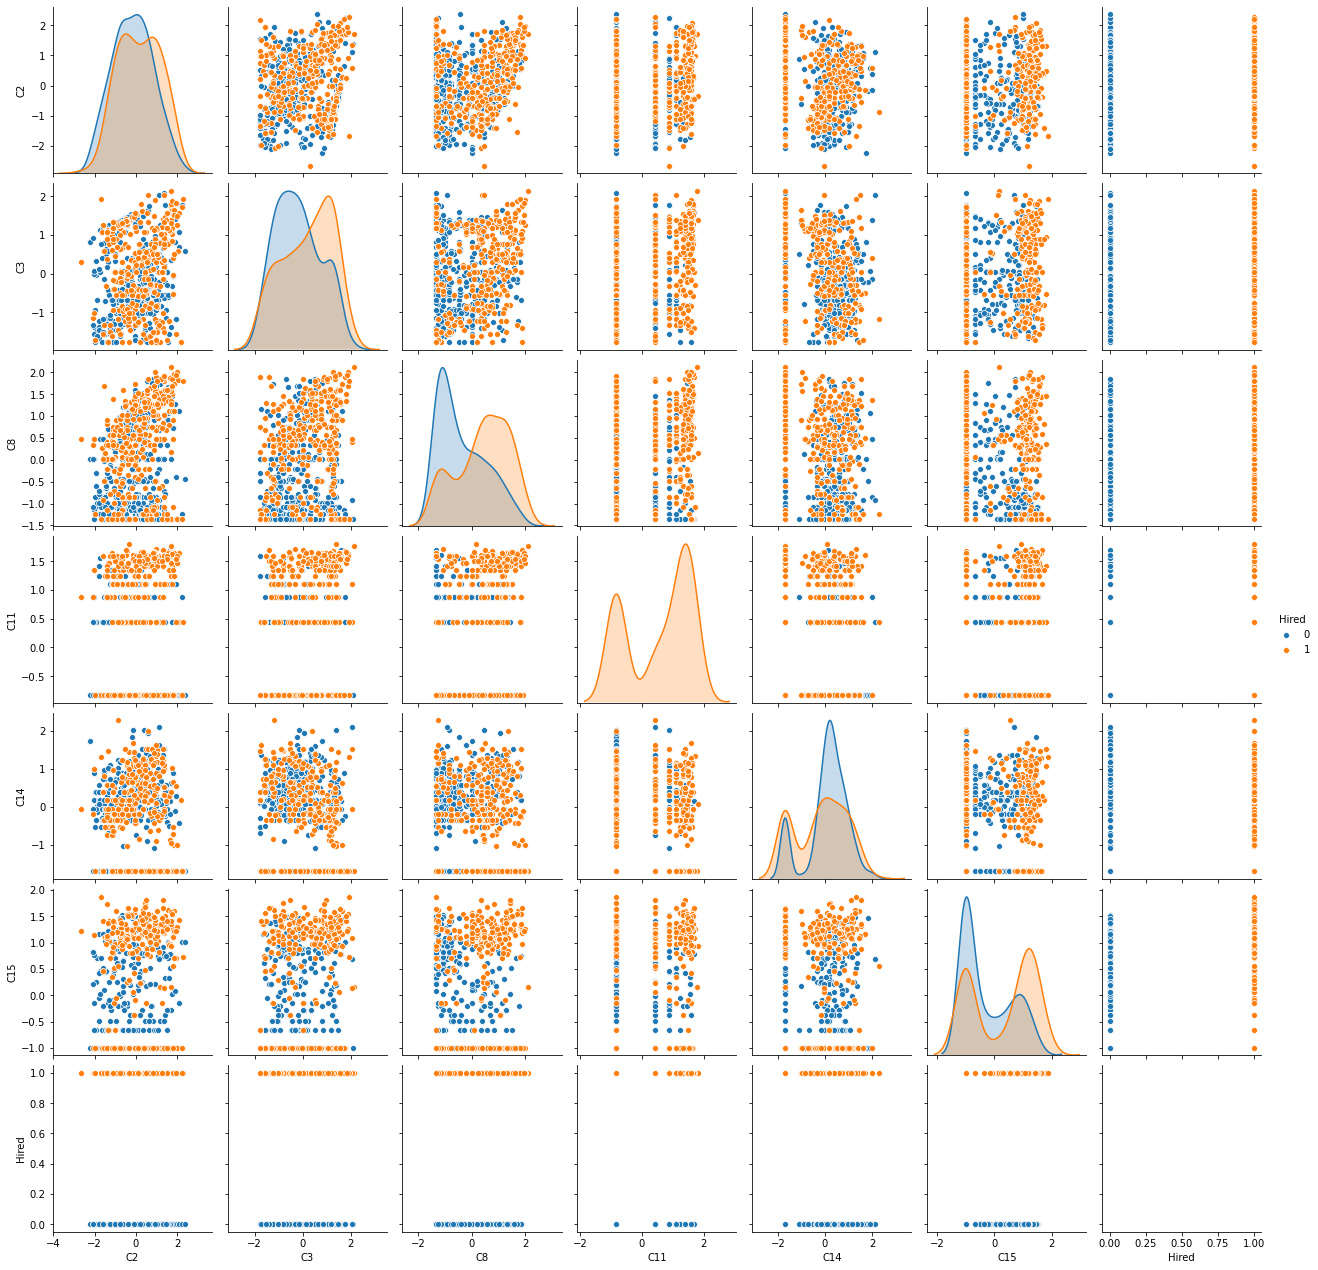

In [54]:
## Distribution of numerical varaiables
sns.pairplot(data=hire_df_num_clean, vars=hire_df_num_clean.columns.values, hue='Hired')

Numerical data has been cleaned and featured and is ready to be passed to ML model.

# 4. Model Building

In this section, processed data would be passed to multiple ML models and performance of each ML model across data is estimated with default parameters and tuned hyper parameters, best ML model for the problem is selected based on performance and is used for prediction.

In [55]:
## Merging the categorical and numerical variables
hire_df_num_clean.drop('Hired', axis = 1, inplace = True)
X = pd.merge(hire_df_num_clean, hire_df_cat, left_index = True, right_index = True)
#X = hire_df_num_clean  + hire_df_cat
X.shape

(690, 14)

In [56]:
X.head()

C2        C3        C8       C11       C14       C15  Hired  C1_b  \
0  0.210211 -1.774256  0.188974  0.439235  0.404085 -0.997061      1     1   
1  1.773303  0.396019  0.913929  1.411046 -0.698863  1.111084      1     0   
2 -0.490074 -1.215338  0.338848 -0.826785  0.742163  1.189061      1     0   
3 -0.091471 -0.528415  1.073588  1.342644 -0.185603 -0.365466      1     1   
4 -1.150510  0.616621  0.447373 -0.826785 -0.048831 -0.997061      1     1   

   C7_s  C9_t  C10_t  C12_t  C4_y  C13_s  
0     1     1      1      0     0      0  
1     1     1      1      0     0      0  
2     1     1      0      0     0      0  
3     1     1      1      1     0      0  
4     1     1      0      0     0      1

In [57]:
#Splitting data into features and target variables
col_name = 'Hired'
last_col = X.pop(col_name)
y = last_col

In [58]:
# Scaling Data, as few models work based on distance if not scaled the performance will be effected
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X_scaled = scale.fit_transform(X)

In [59]:
## Splitting Training data and testing data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 0)

## 4.1 Baseline validation performance
In thi section, different models performance with default parameters is measured using 5 fold cross validation to get a baseline. With this validation set basline, we can see how much tuning improves each of the models. Just because a model has a high basline on this validation set doesn't mean that it will actually do better on the eventual test set.

In [60]:
### Naive Bayes
gnb = GaussianNB()
cv = cross_val_score(gnb,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.81981982 0.89189189 0.86363636 0.84545455 0.86363636]
0.8568877968877968


In [61]:
### Logistic Regression
lr = LogisticRegression(max_iter = 2000)
cv = cross_val_score(lr,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.82882883 0.94594595 0.85454545 0.83636364 0.82727273]
0.8585913185913187


In [62]:
### Logistic Regression withh scaled data
lr = LogisticRegression(max_iter = 2000)
cv = cross_val_score(lr,X_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

[0.83783784 0.93693694 0.84545455 0.83636364 0.82727273]
0.8567731367731369


In [63]:
### Decision Tree Classifier
dt = tree.DecisionTreeClassifier(random_state = 1)
cv = cross_val_score(dt,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.83783784 0.87387387 0.80909091 0.8        0.84545455]
0.8332514332514332


In [64]:
### Decision Tree Classifier with scaled data
dt = tree.DecisionTreeClassifier(random_state = 1)
cv = cross_val_score(dt,X_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

[0.83783784 0.87387387 0.80909091 0.8        0.84545455]
0.8332514332514332


In [65]:
### K Nearest Neighbors
knn = KNeighborsClassifier()
cv = cross_val_score(knn,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.8018018  0.8018018  0.77272727 0.81818182 0.80909091]
0.8007207207207209


In [66]:
#### K nearest Neighbors with scaled data
knn = KNeighborsClassifier()
cv = cross_val_score(knn,X_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

[0.88288288 0.86486486 0.81818182 0.88181818 0.83636364]
0.8568222768222767


In [67]:
### Random Forest Classifier
rf = RandomForestClassifier(random_state = 1)
cv = cross_val_score(rf,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.88288288 0.94594595 0.88181818 0.87272727 0.84545455]
0.8857657657657658


In [68]:
### Random Forest Classifier with scaled data
rf = RandomForestClassifier(random_state = 1)
cv = cross_val_score(rf,X_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

[0.88288288 0.94594595 0.88181818 0.87272727 0.84545455]
0.8857657657657658


In [69]:
## Support Vector Machine with scaled data
svc = SVC(probability = True)
cv = cross_val_score(svc,X_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

[0.83783784 0.93693694 0.84545455 0.85454545 0.82727273]
0.8604095004095005


In [70]:
### XGBoost with scaled data
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state =1)
cv = cross_val_score(xgb,X_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

[0.89189189 0.93693694 0.84545455 0.87272727 0.81818182]
0.8730384930384929


In [71]:
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(estimators = [('lr',lr),('knn',knn),('rf',rf),('gnb',gnb),('svc',svc),('xgb',xgb)], voting = 'soft') 
cv = cross_val_score(voting_clf,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.84684685 0.93693694 0.86363636 0.86363636 0.87272727]
0.8767567567567568


####  Baseline Validation

| Model | Baseline | 
| --- | --- | 
| Naive Bayes  | 85.6% |
| Logistic Regression  | 85.8% | 
| Decision Tree Classifier  | 83.3% | 
| K Nearest Neighbor   | 80% | 
| Random Forest   | 88.5% | 
| **Support Vector Machine**  | **86%** | 
| Xtreme Gradient Boosting  | 87.3% | 
| Soft Voting Classifier - All models | 87.6% |

With default parameters Random forest has the highest performance

## 4.2 Hyperparameter Tuning 

In [72]:
### Tuning the models for further better performance
#simple performance reporting function
def clf_performance(classifier, model_name):
    print(model_name)
    print('Best Score: ' + str(classifier.best_score_))
    print('Best Parameters: ' + str(classifier.best_params_))

In [73]:
### Tuning Logistic Regression
lr = LogisticRegression()
param_grid = {'max_iter' : [2000],
              'penalty' : ['l1', 'l2'],
              'C' : np.logspace(-4, 4, 20),
              'solver' : ['liblinear']}

clf_lr = GridSearchCV(lr, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_lr = clf_lr.fit(X_train_scaled,y_train)
clf_performance(best_clf_lr,'Logistic Regression')

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.6s


Logistic Regression
Best Score: 0.8622276822276822
Best Parameters: {'C': 0.615848211066026, 'max_iter': 2000, 'penalty': 'l1', 'solver': 'liblinear'}


[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    6.0s finished


In [74]:
#### Tunning knn classifier
knn = KNeighborsClassifier()
param_grid = {'n_neighbors' : [3,5,7,9],
              'weights' : ['uniform', 'distance'],
              'algorithm' : ['auto', 'ball_tree','kd_tree'],
              'p' : [1,2]}
clf_knn = GridSearchCV(knn, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_knn = clf_knn.fit(X_train_scaled,y_train)
clf_performance(best_clf_knn,'KNN')

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.3s


KNN
Best Score: 0.8767567567567568
Best Parameters: {'algorithm': 'auto', 'n_neighbors': 7, 'p': 1, 'weights': 'uniform'}


[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:    0.6s finished


In [75]:
#### Tuning SVC
svc = SVC(probability = True)
param_grid = tuned_parameters = [{'kernel': ['rbf'], 'gamma': [.1,.5,1,2,5,10],
                                  'C': [.1, 1, 10, 100, 1000]},
                                 {'kernel': ['linear'], 'C': [.1, 1, 10, 100]},
                                 {'kernel': ['poly'], 'degree' : [2,3,4,5], 'C': [.1, 1, 10, 100]}]
clf_svc = GridSearchCV(svc, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_svc = clf_svc.fit(X_train_scaled,y_train)
clf_performance(best_clf_svc,'SVC')

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 235 out of 250 | elapsed:    3.2s remaining:    0.1s


SVC
Best Score: 0.8622276822276824
Best Parameters: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}


[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:    4.2s finished


In [76]:
#### Tuning Random Forest Classifier
rf = RandomForestClassifier(random_state = 1)
param_grid =  {'n_estimators': [400,450,500,550],
               'criterion':['gini','entropy'],
                                  'bootstrap': [True],
                                  'max_depth': [15, 20, 25],
                                  'max_features': ['auto','sqrt', 10],
                                  'min_samples_leaf': [2,3],
                                  'min_samples_split': [2,3]}
                                  
clf_rf = GridSearchCV(rf, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_rf = clf_rf.fit(X_train_scaled,y_train)
clf_performance(best_clf_rf,'Random Forest')

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 288 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    9.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   46.4s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:  6.5min finished


Random Forest
Best Score: 0.8875839475839475
Best Parameters: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 15, 'max_features': 'auto', 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 400}


In [77]:
######## Tuning XGB classifier
xgb = XGBClassifier(random_state = 1)

param_grid = {
    'n_estimators': [450,500,550],
    'colsample_bytree': [0.75,0.8,0.85],
    'max_depth': [None],
    'reg_alpha': [1],
    'reg_lambda': [2, 5, 10],
    'subsample': [0.55, 0.6, .65],
    'learning_rate':[0.5],
    'gamma':[.5,1,2],
    'min_child_weight':[0.01],
    'sampling_method': ['uniform']
}

clf_xgb = GridSearchCV(xgb, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_xgb = clf_xgb.fit(X_train_scaled,y_train)
clf_performance(best_clf_xgb,'XGB')

Fitting 5 folds for each of 243 candidates, totalling 1215 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   16.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   40.8s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1215 out of 1215 | elapsed:  1.8min finished


XGB
Best Score: 0.8911875511875511
Best Parameters: {'colsample_bytree': 0.85, 'gamma': 0.5, 'learning_rate': 0.5, 'max_depth': None, 'min_child_weight': 0.01, 'n_estimators': 500, 'reg_alpha': 1, 'reg_lambda': 5, 'sampling_method': 'uniform', 'subsample': 0.65}


#### Model Tuned Performance
| Model | Baseline | Tuned Performance |
| --- | --- | --- |
| Naive Bayes  | 85.6% | NA |
| Logistic Regression  | 85.8% | 86.2% |
| Decision Tree Classifier  | 83.3% | NA |
| K Nearest Neighbor   | 80% | 87.6% |
| Random Forest   | 88.5% | 88.7% |
| Support Vector Machine  | 86% | 86.2% |
| **Xtreme Gradient Boosting**  | 87.3% | **89.1%** |

In [78]:
best_lr = best_clf_lr.best_estimator_
best_knn = best_clf_knn.best_estimator_
best_svc = best_clf_svc.best_estimator_
best_rf = best_clf_rf.best_estimator_
best_xgb = best_clf_xgb.best_estimator_

## 4.3 Prediction

In [79]:
### only XGB
voting_clf_xgb = VotingClassifier(estimators = [ ('xgb', best_xgb)], voting = 'soft')
voting_clf_xgb.fit(X_train_scaled, y_train)
y_vc_xgb = voting_clf_xgb.predict(X_test_scaled).astype(int)
## Calculating Accuracy
report = classification_report(y_test, y_vc_xgb)
print(report)

              precision    recall  f1-score   support

           0       0.85      0.86      0.85        78
           1       0.81      0.80      0.81        60

    accuracy                           0.83       138
   macro avg       0.83      0.83      0.83       138
weighted avg       0.83      0.83      0.83       138



In [80]:
### only RF
voting_clf_rf = VotingClassifier(estimators = [ ('rf',best_rf)], voting = 'soft')
voting_clf_rf.fit(X_train_scaled, y_train)
y_vc_rf = voting_clf_rf.predict(X_test_scaled).astype(int)
## Calculating Accuracy
report = classification_report(y_test, y_vc_rf)
print(report)

              precision    recall  f1-score   support

           0       0.85      0.87      0.86        78
           1       0.83      0.80      0.81        60

    accuracy                           0.84       138
   macro avg       0.84      0.84      0.84       138
weighted avg       0.84      0.84      0.84       138



In [81]:
### Only XGB and RF
voting_clf_xgb_rf = VotingClassifier(estimators = [('rf',best_rf), ('xgb', best_xgb)], voting = 'soft')
voting_clf_xgb_rf.fit(X_train_scaled, y_train)
y_vc_xgb_rf = voting_clf_xgb_rf.predict(X_test_scaled).astype(int)
## Calculating Accuracy
report = classification_report(y_test, y_vc_xgb_rf)
print(report)

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        78
           1       0.82      0.82      0.82        60

    accuracy                           0.84       138
   macro avg       0.84      0.84      0.84       138
weighted avg       0.84      0.84      0.84       138



In [82]:
## Ensembling on all models 
voting_clf_all = VotingClassifier(estimators = [('knn',best_knn),('rf',best_rf),('svc',best_svc), ('xgb', best_xgb),('lr', best_lr)], voting = 'soft')
voting_clf_all.fit(X_train_scaled, y_train)
y_vc_all = voting_clf_all.predict(X_test_scaled).astype(int)

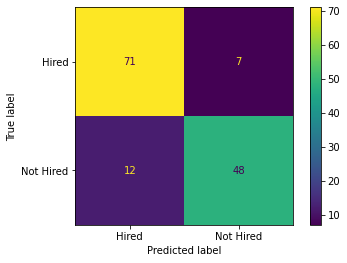

In [83]:
### Plotting confusion matrix
plot_confusion_matrix(voting_clf_all, X_test_scaled, y_test, display_labels = ['Hired', 'Not Hired'])

In [84]:
## Calculating Accuracy
report = classification_report(y_test, y_vc_all)
print(report)

              precision    recall  f1-score   support

           0       0.86      0.91      0.88        78
           1       0.87      0.80      0.83        60

    accuracy                           0.86       138
   macro avg       0.86      0.86      0.86       138
weighted avg       0.86      0.86      0.86       138



| Model | Accuracy|
|---|---|
|Xtreme Gradient Boosting| 83% |
|Random Forest| 84% |
|**Ensemble Model**| **86%**|

# 5. Conclusion

In this project with hiring dataset, data cleaning is performed by handling null values with imputation techniques, EDA is performed and identified relation within features  and with respect to target variable, feature engineering is performed by dropping redundant data and converting categorical values into numerical values, handling outliers of numerical data using power transformation to handle 0 values as well, ML Models have been built to calculate performance of this dataset on model performed hyperparamter tuning for improved performance and prediction is done on the combined model and achieved an **accuracy of 86%** which is a decent performance. This performance can be further enhanced by using complex imputation, feature engineering and ML models.